In [122]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use('seaborn')

<h2>1. RAW FIGHTER DATA</h2>

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/sirdesmond09/ML-Study-Group/master/Assignment/Week3/Raw_fighter_data.csv')


In [6]:
data.head()

,Unnamed: 0,fighter_name,Height,Weight,Reach,Stance,DOB
0,10,Aaron Phillips,"5' 9""",135 lbs.,"70""",Southpaw,"Aug 05, 1989"
1,11,Aaron Riley,"5' 8""",155 lbs.,"69""",Southpaw,"Dec 09, 1980"
2,12,Aaron Rosa,"6' 4""",205 lbs.,"78""",Orthodox,"May 28, 1983"
3,13,Aaron Simpson,"6' 0""",170 lbs.,"73""",Orthodox,"Jul 20, 1974"
4,17,Abdul Razak Alhassan,"5' 10""",170 lbs.,"73""",Orthodox,"Aug 11, 1985"


In [7]:
reach = list(map(str, data['Reach']))
cleaned_reach = []
for _ in reach:
    i = _.replace('"', '')
    cleaned_reach.append(i)
data['Reach'] = list(map(int, cleaned_reach))

In [8]:
weight = list(map(str, data['Weight']))
cleaned_weight = []
for _ in weight:
    i = _.replace(' lbs.', '')
    cleaned_weight.append(i)
data['Weight'] = list(map(int, cleaned_weight))
data.head(4)
len(weight)

1485

In [9]:
height = list(map(str, data['Height']))
cleaned_height = []
for _ in height:
    i = _.replace('\'' , '.').replace('"', '')
    cleaned_height.append(i)

In [10]:
ccleaned = []
for i in cleaned_height:
    inches = int(i[2:])
    inches2feet = inches/12
    feet = int(i[0])
    converted = feet + inches2feet
    ccleaned.append(converted)
data['Height'] = list(map(float, ccleaned))

In [11]:
data.rename(columns = {'Reach' : 'reach(inches)', 'Weight' : 'weight(lbs)', 'Height' : 'height(feet)'}, inplace = True)
data.drop(columns = 'Unnamed: 0', inplace = True)

In [12]:
data.head()

,fighter_name,height(feet),weight(lbs),reach(inches),Stance,DOB
0,Aaron Phillips,5.750000,135,70,Southpaw,"Aug 05, 1989"
1,Aaron Riley,5.666667,155,69,Southpaw,"Dec 09, 1980"
2,Aaron Rosa,6.333333,205,78,Orthodox,"May 28, 1983"
3,Aaron Simpson,6.000000,170,73,Orthodox,"Jul 20, 1974"
4,Abdul Razak Alhassan,5.833333,170,73,Orthodox,"Aug 11, 1985"


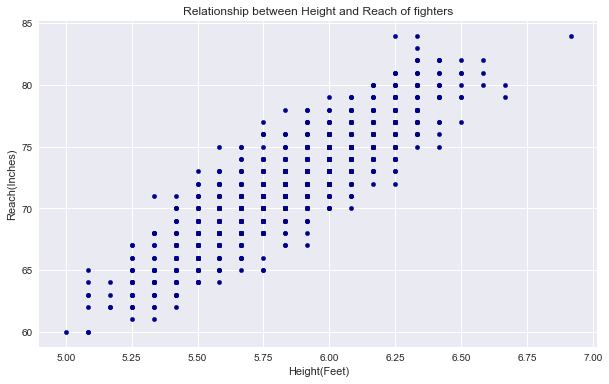

In [13]:
df_HR = data[['height(feet)', 'reach(inches)']]
df_HR.head(5)

df_HR.plot(kind='scatter', x='height(feet)', y='reach(inches)', figsize=(10, 6), color='darkblue')

plt.title('Relationship between Height and Reach of fighters')
plt.xlabel('Height(Feet)')
plt.ylabel('Reach(Inches)')

plt.show()

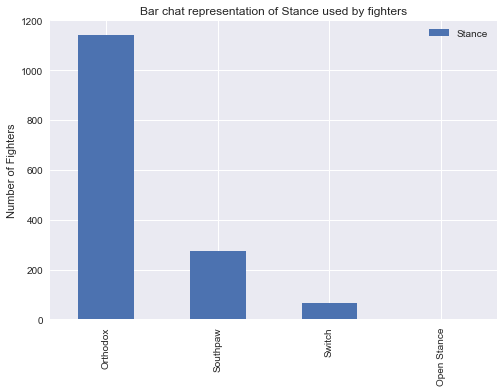

In [14]:
df_stance = pd.DataFrame(data['Stance'].value_counts())
df_stance.plot(kind = 'bar')

plt.title('Bar chat representation of Stance used by fighters')
plt.ylabel('Number of Fighters')


plt.show()

In [15]:
df_date = pd.DataFrame(data['DOB'])
dates = df_date['DOB'].values.tolist()
cleaned_dates = [ ]
for _ in dates:
    i = str(_[0:3])
    cleaned_dates.append(i)
df_date['months'] = cleaned_dates
months = df_date['months'].unique()


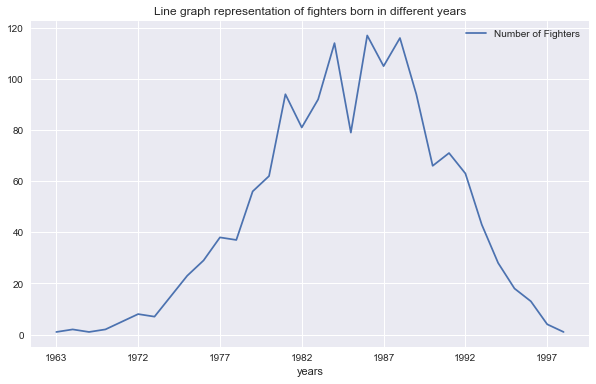

In [27]:
years = df_date['DOB'].values.tolist()
cleaned_years = []
for year in years:
    i = str(year[-4:])
    cleaned_years.append(i)
df_date['years'] = cleaned_years
year = df_date.groupby('years').count()
year.drop(columns = 'DOB', inplace = True)

year.rename(columns = {'months': 'Number of Fighters'}, inplace = True)
year.plot(kind = 'line', figsize = (10, 6))

plt.title('Line graph representation of fighters born in different years')

plt.show()

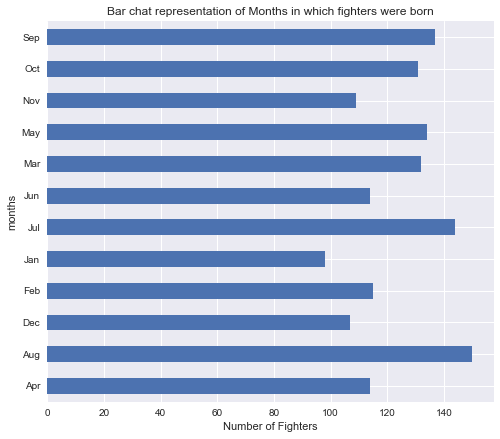

In [22]:
month = df_date.groupby('months').count()
month.rename(columns = {'years': 'Number of Fighters'}, inplace = True)
month.drop(columns = 'DOB', inplace = True)
month.plot(kind = 'barh', figsize = (8, 7), legend=False)
plt.title('Bar chat representation of Months in which fighters were born')
plt.xlabel('Number of Fighters')



plt.show()

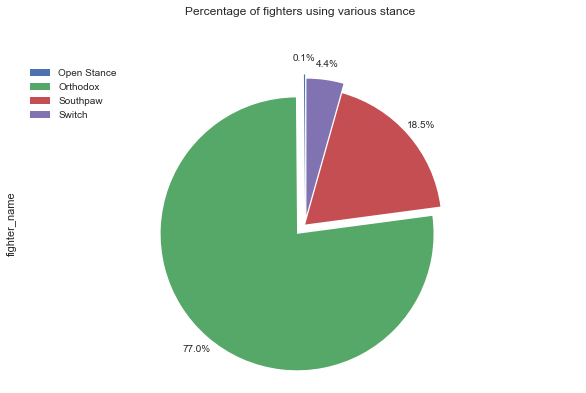

In [99]:
data_stance = data.groupby('Stance').count()

explode_list = [0.1, 0.09, 0, 0.07]

data_stance['fighter_name'].plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=False,       
                            labels=None,         
                            pctdistance=1.12, 
                            explode=explode_list,
                            )


plt.title('Percentage of fighters using various stance', y=1.12) 

plt.axis('equal') 

plt.legend(labels=data_stance.index, loc='upper left') 

plt.show()

In [24]:
data.describe()

,height(feet),weight(lbs),reach(inches)
count,1485.000000,1485.000000,1485.000000
mean,5.850898,165.917845,71.921212
std,0.283234,33.916200,4.071115
min,5.000000,115.000000,60.000000
25%,5.666667,145.000000,69.000000
50%,5.833333,155.000000,72.000000
75%,6.083333,185.000000,75.000000
max,6.916667,265.000000,84.000000


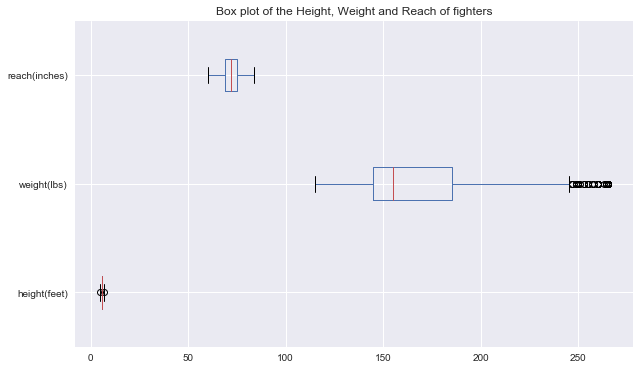

In [25]:
data_hwr = data[['height(feet)', 'weight(lbs)', 'reach(inches)']]
data_hwr.plot(kind = 'box', figsize = (10, 6), vert=False)

plt.title('Box plot of the Height, Weight and Reach of fighters')
plt.show()

<h2>2. DATA</h2>

In [29]:
dataset = pd.read_csv('https://raw.githubusercontent.com/sirdesmond09/ML-Study-Group/master/Assignment/Week3/data.csv')

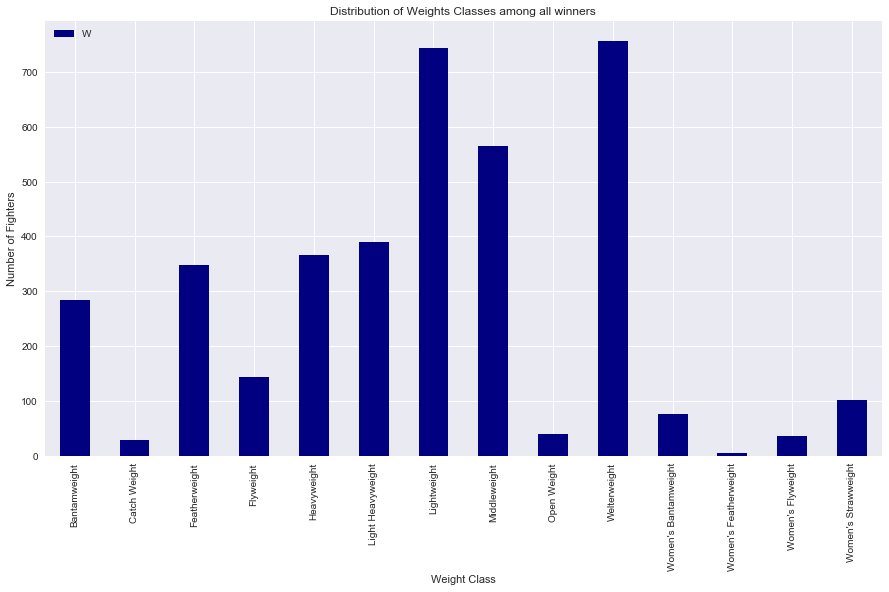

In [121]:
df_weight_class = pd.DataFrame(dataset[['weight_class', 'Winner']])
weight = df_weight_class.groupby('weight_class').count()
weight.plot(kind = 'bar', figsize = (15, 8), color = 'navy')

plt.title('Distribution of Weights Classes among all winners')
plt.xlabel('Weight Class')
plt.ylabel('Number of Fighters')

plt.legend(labels= 'Winners', loc='upper left') 

plt.show()

In [35]:
red_ages   = np.array(dataset['R_age'])
blue_ages = np.array(dataset['B_age'])

ages = np.hstack((red_ages, blue_ages)) 

new_data = pd.DataFrame({})

new_data['ages'] = ages
new_data
x = new_data.groupby(pd.cut(x = ages, bins = 7)).count().reset_index()
distribution = x.set_index('index')
distribution

,ages
index,
"(18.972, 23.0]",419
"(23.0, 27.0]",1966
"(27.0, 31.0]",2866
"(31.0, 35.0]",1756
"(35.0, 39.0]",562
"(39.0, 43.0]",87
"(43.0, 47.0]",17


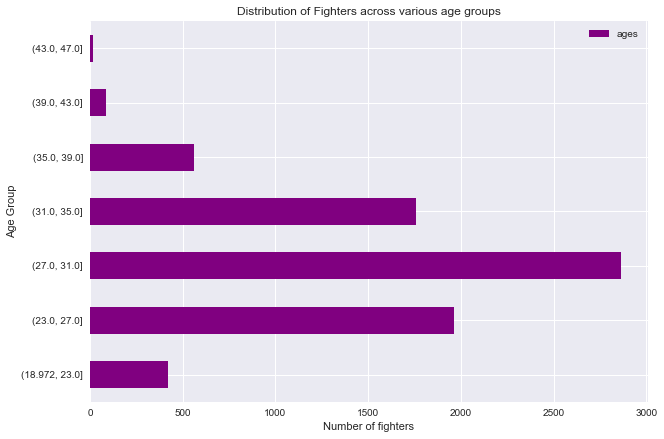

In [36]:
distribution.plot(kind = 'barh', figsize = (10, 7), color = 'purple')

plt.title('Distribution of Fighters across various age groups')
plt.xlabel('Number of fighters')
plt.ylabel('Age Group')



plt.show()

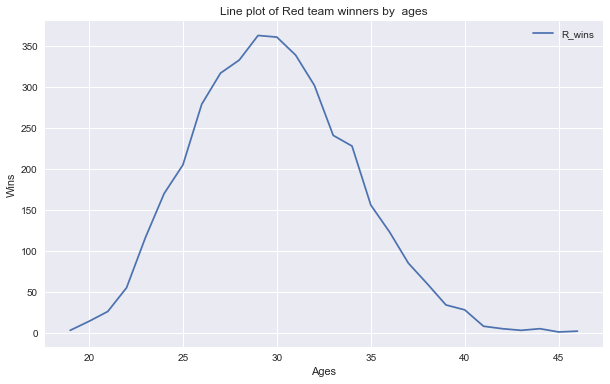

In [37]:
df_WA = dataset[['R_wins', 'R_age']]
df_WA.groupby('R_age').count().plot(kind = 'line', figsize = (10, 6))

plt.title('Line plot of Red team winners by  ages')
plt.xlabel('Ages')
plt.ylabel('Wins')



plt.show()

In [38]:
dataset.head()

,Unnamed: 0,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [100]:
blue_win = dataset[['B_win_by_Decision_Majority',
 'B_win_by_Decision_Split',
 'B_win_by_Decision_Unanimous',
 'B_win_by_KO/TKO',
 'B_win_by_Submission',
 'B_win_by_TKO_Doctor_Stoppage',]]
blue_win_trans = blue_win.transpose()
blue_win_trans

,0,1,2,3,4,5,6,7,8,9,...,3869,3870,3871,3872,3873,3874,3875,3876,3877,3878
B_win_by_Decision_Majority,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B_win_by_Decision_Split,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B_win_by_Decision_Unanimous,0.0,1.0,7.0,2.0,1.0,3.0,2.0,1.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B_win_by_KO/TKO,2.0,0.0,10.0,2.0,0.0,0.0,3.0,0.0,2.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0
B_win_by_Submission,1.0,0.0,6.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,...,0.0,2.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0
B_win_by_TKO_Doctor_Stoppage,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
blue_win_trans['Total'] =blue_win_trans.sum(axis=1)


In [107]:
blue_win_trans.head()

,0,1,2,3,4,5,6,7,8,9,...,3870,3871,3872,3873,3874,3875,3876,3877,3878,Total
Majority Decision,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0
Decision Split,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1092.0
Unanimous Decision,0.0,1.0,7.0,2.0,1.0,3.0,2.0,1.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4013.0
Knock out/ TKO,2.0,0.0,10.0,2.0,0.0,0.0,3.0,0.0,2.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,4489.0
Submission,1.0,0.0,6.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,...,2.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,2837.0


In [108]:
blue_win_trans.index = ['Majority Decision', 'Decision Split', 
              'Unanimous Decision', 'Knock out/ TKO',
              'Submission', 'TKO/Doctor Stoppage']
blue_win_trans.index

Index(['Majority Decision', 'Decision Split', 'Unanimous Decision',
       'Knock out/ TKO', 'Submission', 'TKO/Doctor Stoppage'],
      dtype='object')

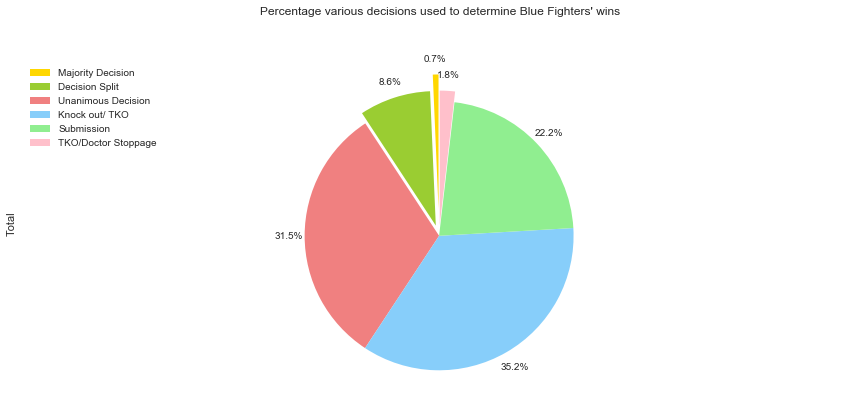

In [125]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode = [0.2, 0.08, 0, 0, 0, 0.08] # ratio for each continent with which to offset each wedge.
blue_win_trans['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=False,       
                            labels=None,         
                            pctdistance=1.12,    
                            colors=colors_list,  
                            explode=explode 
                            )

# scale the title up by 12% to match pctdistance
plt.title("Percentage various decisions used to determine Blue Fighters' wins" , y = 1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=trans.index, loc='upper left') 

plt.show()

In [116]:
red_team_streak = dataset[['R_current_lose_streak',
 'R_current_win_streak']]
red_team_streak.columns = ['Current lose streak', 'Current win streak' ]
red_team_streak.columns 

Index(['Current lose streak', 'Current win streak'], dtype='object')

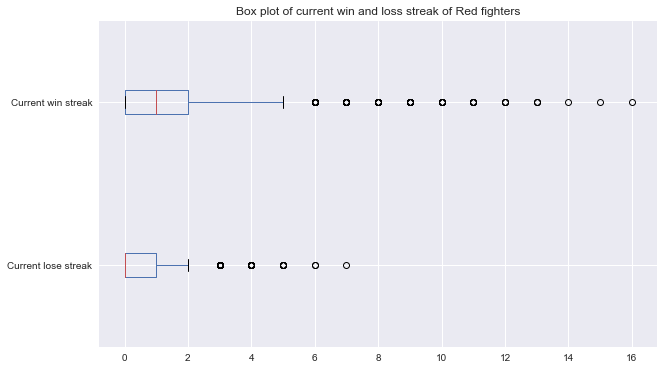

In [120]:
red_team_streak.plot(kind = 'box', figsize = (10, 6), vert=False)

plt.title('Box plot of current win and loss streak of Red fighters')
plt.show()

In [165]:
df_blue = dataset[['B_wins', 'B_age']]
r = df_blue.groupby('B_age').count()
r['num'] = [  a for a in range(len(r))]
g = r.reset_index().set_index('num')
g.head()

,B_age,B_wins
num,,
0,20.0,8
1,21.0,24
2,22.0,62
3,23.0,111
4,24.0,152


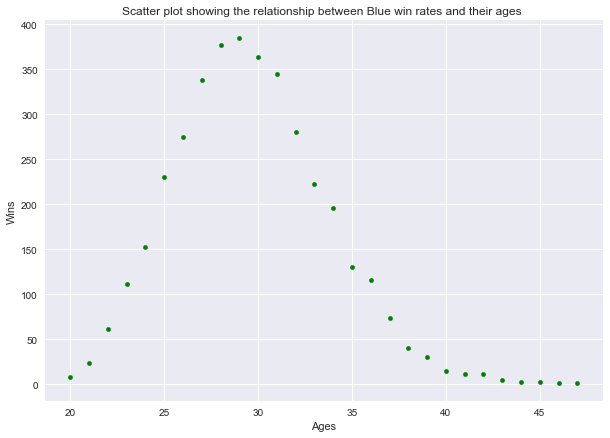

In [170]:
g.plot( kind = 'scatter', x = 'B_age', y = 'B_wins', figsize = (10, 7), color = 'green')

plt.title('Scatter plot showing the relationship between Blue win rates and their ages ')
plt.xlabel('Ages')
plt.ylabel('Wins')



plt.show()